<a href="https://colab.research.google.com/github/dudhmande-aditi/Exploratory-Data-Analysis/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

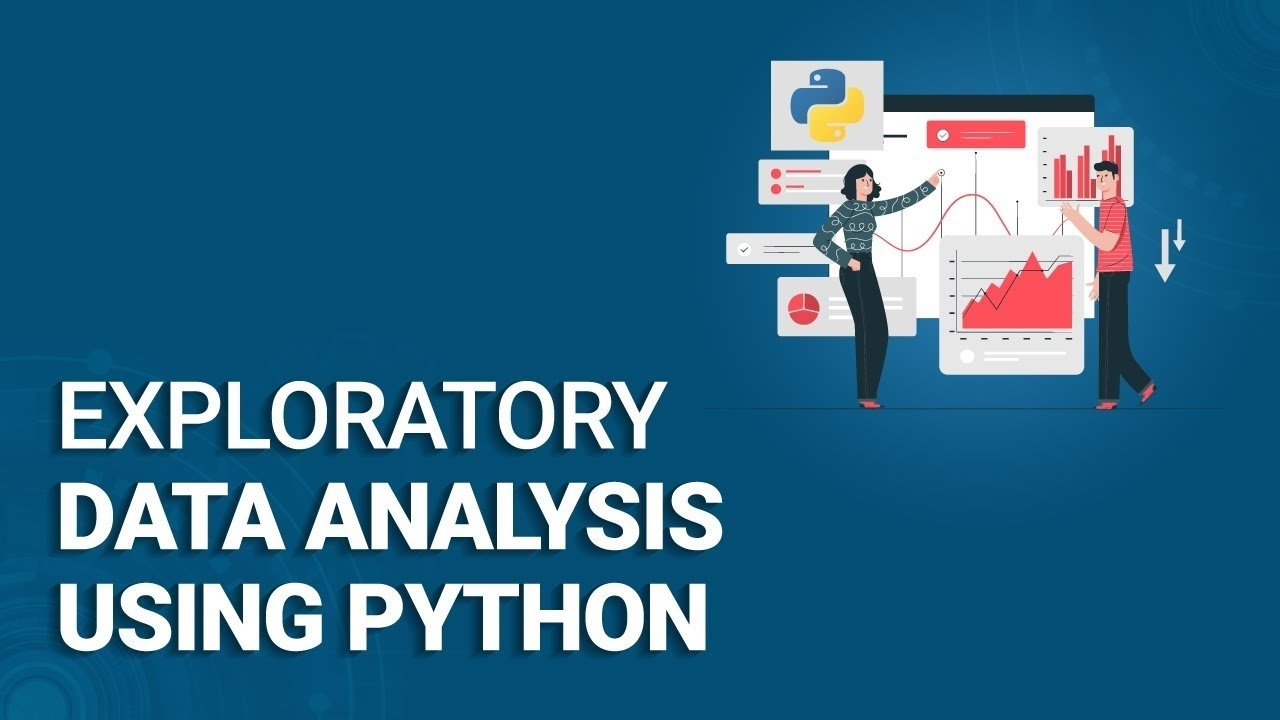

#**Exploratory Data Analysis of Car features**

# What is Exploratory Data Analysis?

In statistics, Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods, i.e. various kinds of graphs and charts.

# Step 1: Importing Libraries and Dataset, and general analysis of the dataset

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
# Importing dataset
carData=pd.read_csv('/content/drive/My Drive/data.csv')
# Displaying the top 5 rows of the dataset
carData.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Displaying last 5 rows of the dataset
carData.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
# Checking the Data types of the data
carData.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
# Checking the Statistical summary of the data
carData.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Checking the Shape of the dataset
carData.shape

(11914, 16)

In [ ]:
# Checking the number of NULL values, if existent
d=carData.isnull().sum()
d

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

From the above output we can clearly see that there are maximum number of null values in the 'Market Category' column. Thus, for the ease of things we opt to remove it from the labelled columns. Also, we see that many other parameters do not have much significance in determining the prices of the cars. Thus dropping those columns won't make much of a difference in the processing of the model.

# Step 2: Dropping the less significant columns

In [ ]:
# Checking shape of dataset before dropping columns
carData.shape

(11914, 16)

In [ ]:
# Eliminating the less significant columns
carData = carData.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis = 1)
carData.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
# Checking shape of dataset after less significant columns have been dropped
carData.shape

(11914, 13)

# Step 3: Renaming columns

In [ ]:
# Renaming the columns mentioned in the problem statement
carData.rename(columns = { "Engine HP": "HP", "Engine Cylinders": "Cylinders",
                          "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H",
                          "city mpg": "MPG-C", "MSRP": "Price"}, inplace = True) 

In [ ]:
# Displaying the changed columns
carData.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# Step 4: Detection and Removal of duplicates, null values and missing data in the dataset

In [ ]:
# Checking shape of dataset before dropping duplicates, null values and the missing data
carData.shape

(11914, 13)

In [ ]:
# Detecting and dropping the duplicates
carData.drop_duplicates()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
# Checking the remaining NULL values
print(carData.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [ ]:
# Dropping the null values
carData=carData.dropna()
carData.count()

Make             11816
Model            11816
Year             11816
HP               11816
Cylinders        11816
Transmission     11816
Drive Mode       11816
Vehicle Size     11816
Vehicle Style    11816
MPG-H            11816
MPG-C            11816
Popularity       11816
Price            11816
dtype: int64

In [ ]:
# Checking the number of null values after the null data is dropped
carData.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

In [ ]:
# Checking shape of dataset after removal of duplicates, missing data and Null values
carData.shape

(11816, 13)

Thus it is observed that the shape of the dataset has greatly changed on removing the duplicates, missing values and the null values. It is seen that the number of rows in the dataset have changed from 11914 to 11816, with the number of columns being the same.

# Step 5:Plotting graphs for various columns and detection and removal of outliers

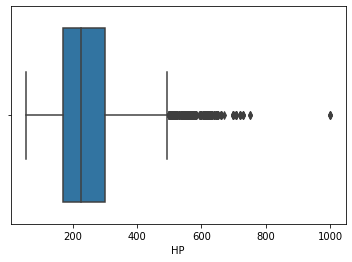

In [ ]:
#Plotting graphs of Data (Columns)
sns.boxplot(x=carData['HP'])

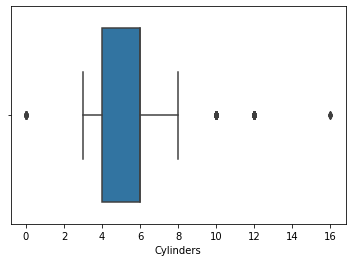

In [ ]:
sns.boxplot(x=carData['Cylinders'])

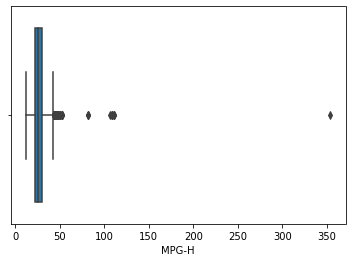

In [ ]:
sns.boxplot(x=carData['MPG-H'])

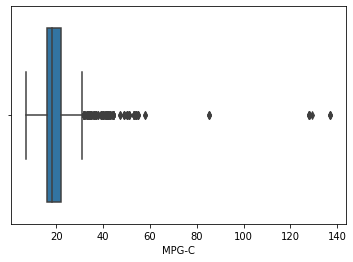

In [ ]:
sns.boxplot(x=carData['MPG-C'])

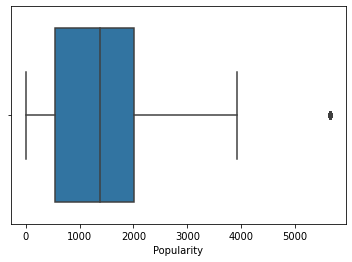

In [ ]:
sns.boxplot(x=carData['Popularity'])

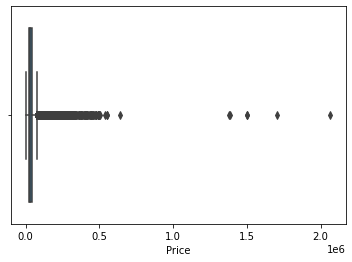

In [ ]:
sns.boxplot(x=carData['Price'])

In [ ]:
# Checking shape of dataset before removal of outliers
carData.shape

(11816, 13)

In all the **Box and Whisker Plots** above, we see that there are certain points which lie outside the whiskers. These are the outliers.Thus, outliers are those points which the eye can easily see, as they as located outside the range of the whiskers, and farther away from the box plot. These have to be removed in order to better train the machine. One method of doing this is the Interquartile Range Method.

In [ ]:
# Removal of outliers by Interquartile Range Method
q1=carData.quantile(0.25)
q3=carData.quantile(0.75)
iqr=q3-q1
iqr

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21215.0
dtype: float64

In [ ]:
carData=carData[~((carData<(q1-1.5*iqr))|(carData>(q3+1.5*iqr))).any(axis=1)]

In [ ]:
# Checking shape of dataset after removal of outliers
carData.shape

(9054, 13)

Thus it is observed that the shape of the dataset has greatly changed on removing the outliers. It is seen that the number of rows in the dataset have changed from 11816 to 9054, with the number of columns being the same.

# Step 6: Representation of Top 10 Car Brands and their average prices

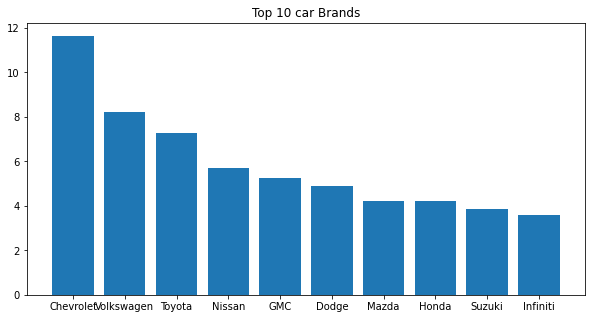

In [ ]:
# Percentage of car per brand
counts=carData['Make'].value_counts()*100/sum(carData['Make'].value_counts())
# Top 10 popular brands
popularCars=counts.index[:10]
# Plotting the bar plot for ease of understanding
plt.figure(figsize=(10,5))
plt.bar(popularCars,height=counts[:10])
plt.title('Top 10 car Brands')
plt.show()

In [ ]:
# Grouping all the same brand cars together with their average prices
prices=carData[['Make','Price']].loc[(carData['Make']=='Chevrolet')|
                                     (carData['Make']=='Volkswagen')|
                                     (carData['Make']=='Toyota')|
                                     (carData['Make']=='Nissan')|
                                     (carData['Make']=='GMC')|
                                     (carData['Make']=='Dodge')|
                                     (carData['Make']=='Mazda')|
                                     (carData['Make']=='Honda')|
                                     (carData['Make']=='Suzuki')|
                                     (carData['Make']=='Infiniti')].groupby('Make').mean()
prices

,Price
Make,
Chevrolet,27591.962049
Dodge,25983.345372
GMC,32866.520000
Honda,27511.286842
Infiniti,42874.197531
Mazda,20366.657963
Nissan,28148.655706
Suzuki,18044.339080
Toyota,29223.393020


# Step 7: Plotting the Correlation Matrix

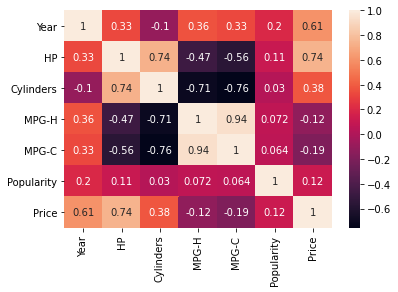

In [ ]:
# Correlation Matrix
corrMatrix=carData.corr()
# Plotting the heat map
sns.heatmap(corrMatrix,annot=True)

From the heatmap plotted above, it can be concluded that:

**>>> Price is positively dependent on features and Horse Power(HP) and Year**

which implies that when the power of engine is increased, so does the price of the car.

**>>> The features HP and Cylinders are positively dependent on each other**

i.e. if number of Cylinders are increased, the HP also increases.

**>>>MPG-H and MPG-C have strong negative correlation with Cylinders.**

i.e. if number of cylinders are increased, MPG-H and MPG-C decreases.

# Step 8: Exploratory Data Analysis and plots

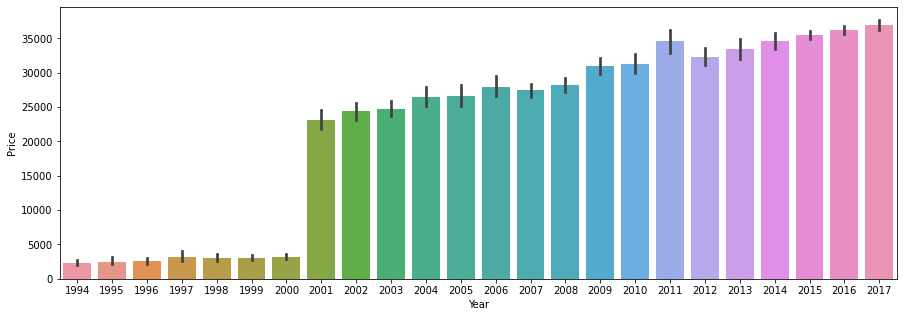

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(carData['Year'],carData['Price'])

Several things can be observed from the above plot:

**>>>There has been a sudden hike in prices of cars after the year 2000.**

**>>>After 2001, the prices of cars have been increasing uniformly.**

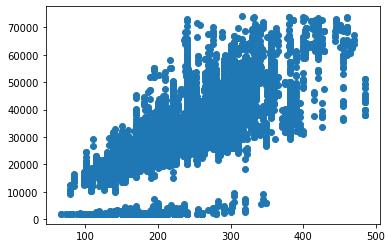

In [ ]:
plt.scatter(carData['HP'],carData['Price'])

**>>>The prices have been increasing almost proportionally with the power of engine of the cars.** 

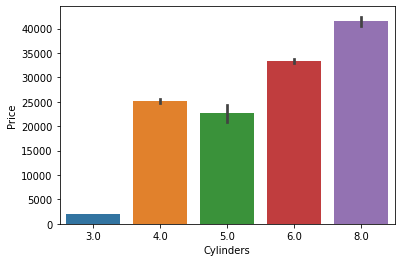

In [ ]:
sns.barplot(carData['Cylinders'],carData['Price'])

**>>>There is an almost linear relationship between the number of cylinders and the prices of cars.** As the number of cylinders increases, so does the price.

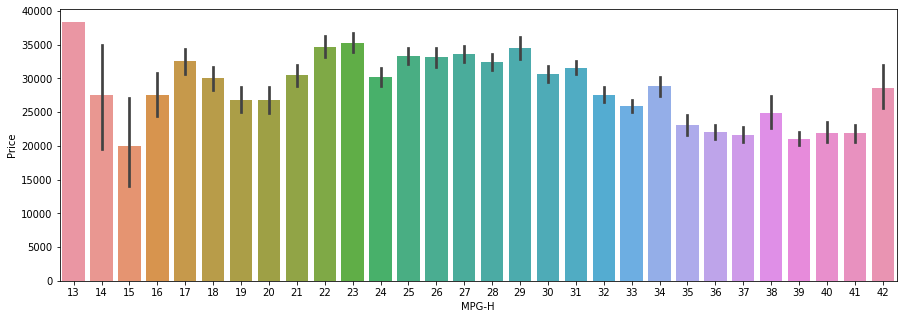

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(carData['MPG-H'],carData['Price'])

**>>>There is an inverse relationship between the MPG-H and the prices.** As the MPG-H goes on increasing, the prices go on decreasing.

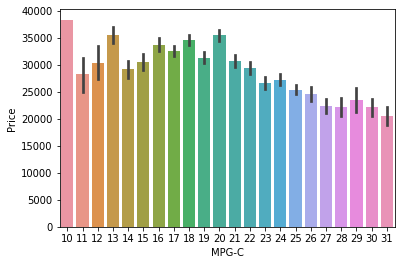

In [ ]:
sns.barplot(carData['MPG-C'],carData['Price'])

**>>>There is an inverse relationship between the MPG-C and the prices.** As the MPG-C goes on increasing, the prices go on decreasing.

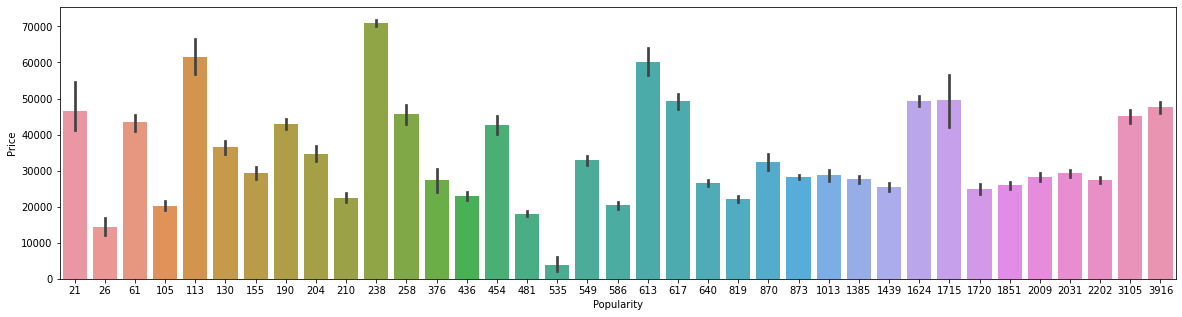

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(carData['Popularity'],carData['Price'])

**>>> There is little or no effect of popularity on the prices.**

In [ ]:
import plotly.express as px
fig=px.scatter_3d(carData,x='MPG-H', y='MPG-C', z='Price')
fig.show()

From all the graphs plotted, it can be observed that the graphs are in accordance with the Heat Maps plotted.

# Step 9 and Step 10: Splitting the Dataset, Building a model with different algorithms, and checking their effect on various metrics

It can be seen that there are many columns which carry categorical data in the dataset. Such categorical data cannot be read by machines. In order to convert the categorical data to a machine readable form, there arises the need of Label Encoding.

In [ ]:
# Code to find those features who have categorical values
data_column_category = carData.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

Now that the features who have categorical values are found out, we proceed to encode them.

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_encoder = LabelEncoder()
for i in data_column_category:

    carData [i] = label_encoder.fit_transform(carData[i])

print("Label Encoded Data: ")

carData.head()

Label Encoded Data: 


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500


From the output it is observed that all the data is converted in numerical form. Now one can proceed for splitting the dataset, and training and testing the model using various algorithms with Price as the target variable.

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

In [ ]:
# Selecting the variables
X=carData.iloc[:,:-1] 
y=carData.iloc[:,-1] 
# Splitting the dataset in a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(7243, 12) (7243,)
(1811, 12) (1811,)


In [ ]:
#MODEL 1 FOR TESTING: THE KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

Distribution curve:

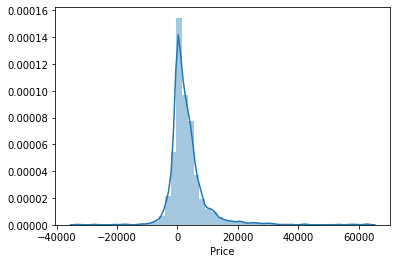

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

Performance on metrics:

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4035.806736609608
Mean Squared Error: 49320179.58034235
Root Mean Squared Error: 63.52799962701177
R2 Score: 0.7811769525595527


It is seen that the value of R2 Score is okay, but not upto the mark. So, this model cannot be considered perfect.

In [ ]:
#MODEL 2 FOR TESTING: THE LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X,y)

0.7202649552313045

Distribution curve:

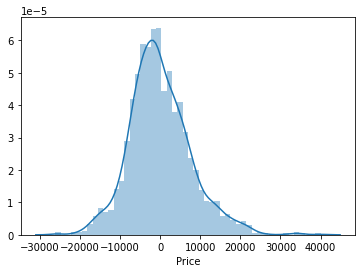

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

Performance on metrics:

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 5848.276716515733
Mean Squared Error: 58741195.1581563
Root Mean Squared Error: 76.47402641757353
R2 Score: 0.7393779291930025


In [ ]:
#MODEL 3 FOR TESTING: THE DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

Distribution curve:

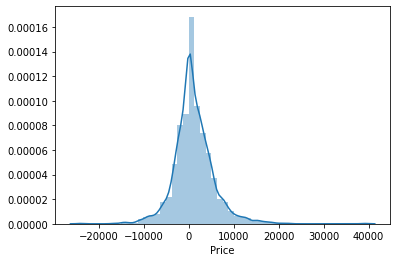

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3127.981225842076
Mean Squared Error: 20679632.070679184
Root Mean Squared Error: 55.92835797555723
R2 Score: 0.9082489125514693


We see that the value of R2 score has increased, but there is still some scope for improvement.

In [ ]:
#MODEL 4 FOR TESTING: THE RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rfc_model = RandomForestRegressor(n_estimators=72)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)
# calculating the accuracies
print("Training Accuracy :",rfc_model.score(X_train,y_train))
print("Testing Accuracy :",rfc_model.score(X_test,y_test))

Training Accuracy : 0.9789756046802274
Testing Accuracy : 0.9485319032613836


In the Random Forest algorithm, the accuracy is satisfactory. The machine is now well trained and tested. Thus, it is a successful machine.

Distribution curve:

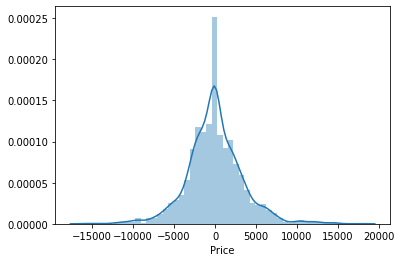

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

Performance on metrics:

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 2433.559433238818
Mean Squared Error: 11600312.688716313
Root Mean Squared Error: 49.331120332289416
R2 Score: 0.9485319032613836


Thus we see that the algorithm of Random Forest works best for this particular machine.